Attention Feature Extraction

In [14]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

# Image

In [15]:
# With Centriod

In [16]:
width_MBR = 200
height_MBR = 200

In [17]:
!pip install requests

# SEP

In [18]:
import cv2
import numpy as np
import requests
from PIL import Image
import csv
from datetime import datetime
import io

width_MBR = 200
height_MBR = 200

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")
    # Helioviewer requires UTC ISO timestamps

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2): # fetches image for SEP event time
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"    # Full-disk image
    source_id = "3"     # specific data source

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)
        #converts to API, builds URL request and calls API to download image
    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }   # heliographic arcseconds into pixel coordinates

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Binarize the image
            _, thresh = cv2.threshold(cropped_image, 128, 255, cv2.THRESH_BINARY)

            # Find contours on the binarized image
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x, y, w, h = cv2.boundingRect(contours[0]) if contours else (0, 0, 0, 0)
            mbr = cropped_image[y:y+h, x:x+w]  # Get the MBR region

            cropped_images_AR_SEP[index_counter] = mbr
            index_counter += 1
            print(f"MBR for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Further code to continue the logic as required.
# ...


MBR for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
MBR for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
MBR for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
MBR for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
MBR for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
MBR for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
MBR for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
MBR for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
MBR for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
MBR for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
MBR for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
MBR for 2000-11-24 14:50:00 processed and stored as NumPy array with index 11.
MBR for 2000-11-25 00:55:00 processed and stored as NumPy arra

In [19]:
cropped_images_AR_SEP[0]

array([[165, 168, 167, ..., 170, 181, 192],
       [161, 162, 165, ..., 175, 181, 189],
       [158, 157, 161, ..., 178, 181, 186],
       ...,
       [171, 168, 165, ..., 156, 161, 168],
       [168, 166, 163, ..., 158, 168, 178],
       [174, 171, 167, ..., 162, 168, 174]], shape=(200, 200), dtype=uint8)

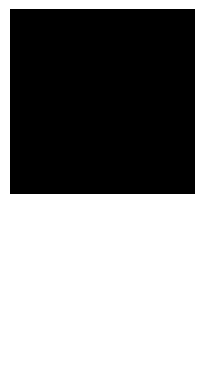

In [20]:
import matplotlib.pyplot as plt

# Assuming 'cropped_images_AR' contains the processed images
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


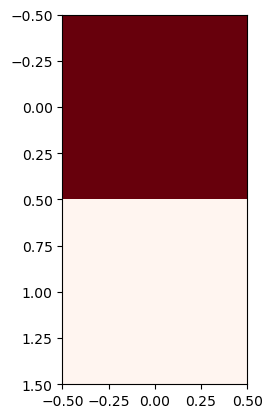

In [21]:
plt.imshow(cropped_images_AR_SEP[3], cmap='Reds_r')

In [22]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

In [23]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw contours on the mask
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

In [24]:
cropped_images_AR_SEP[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(200, 200), dtype=uint8)

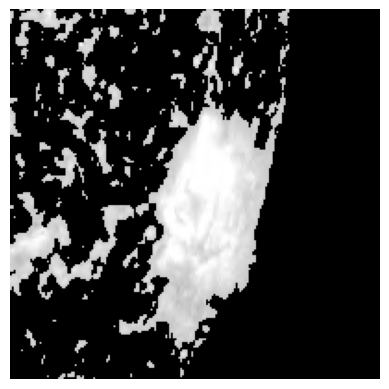

In [25]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

## SEP Mask

In [26]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,  #for SDO
                'event_coord2': coord2 / 2.63,  #arcsec/pixel
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)



            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

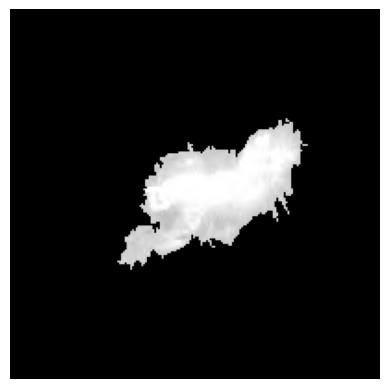

In [27]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [28]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }
            
            
            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_SEP = {}

for index, image in cropped_images_AR_SEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_SEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

In [29]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_SEP = {}
index_counter = 0

USE_ADAPTIVE = False   # False to use old fixed threshold

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # numpy array

            # THRESHOLD STEP
            if USE_ADAPTIVE:
                thresh = cv2.adaptiveThreshold(
                    cropped_image.astype(np.uint8),
                    255,
                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                    cv2.THRESH_BINARY,
                    35,   # blockSize (odd number) – tune this
                    5     # C value – tune this
                )
            else:
                _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            if contours:
                contour_areas = [cv2.contourArea(contour) for contour in contours]
                largest_contour_index = np.argmax(contour_areas)
                largest_contour = contours[largest_contour_index]

                # Create a blank mask
                mask = np.zeros_like(cropped_image)

                # Draw largest contour on the mask
                cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

                # Apply the mask to the cropped image
                result = np.where(mask != 0, cropped_image, 0)
            else:
                result = cropped_image

            # Store the processed image
            cropped_images_AR_SEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/SEP_date_100MeV_Dates_Flares_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['SEP100']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-11-04 05:50:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-06 11:45:00 processed and stored as NumPy array with index 1.
Cropped image for 1998-04-20 09:35:00 processed and stored as NumPy array with index 2.
Cropped image for 1998-05-06 07:55:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-11-14 05:00:00 processed and stored as NumPy array with index 4.
Cropped image for 2000-06-10 16:40:00 processed and stored as NumPy array with index 5.
Cropped image for 2000-07-14 10:00:00 processed and stored as NumPy array with index 6.
Cropped image for 2000-07-22 11:15:00 processed and stored as NumPy array with index 7.
Cropped image for 2000-09-12 11:30:00 processed and stored as NumPy array with index 8.
Cropped image for 2000-10-16 06:40:00 processed and stored as NumPy array with index 9.
Cropped image for 2000-11-24 04:55:00 processed and stored as NumPy array with index 10.
Cropped image for 2000-11-24 14

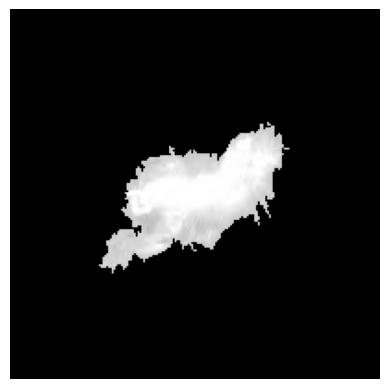

In [30]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


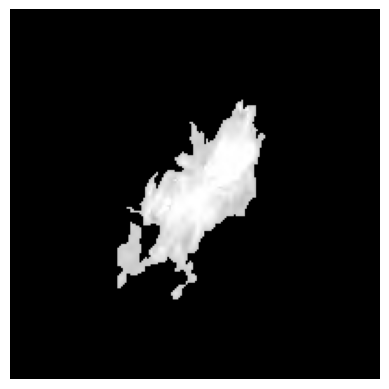

In [31]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


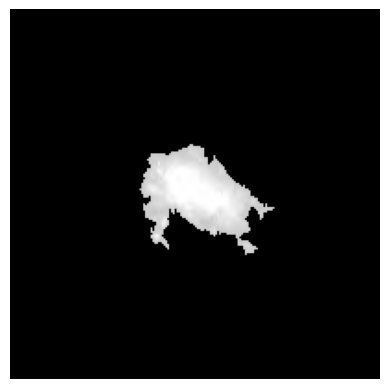

In [32]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


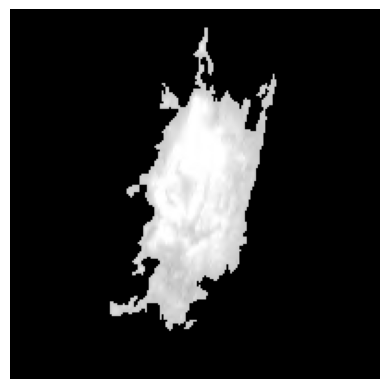

In [33]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


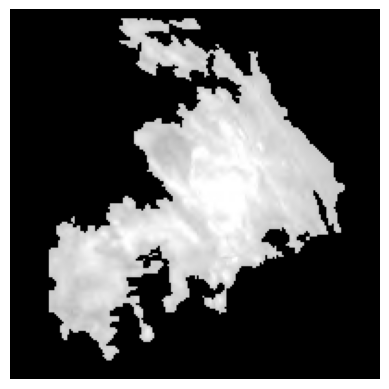

In [34]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


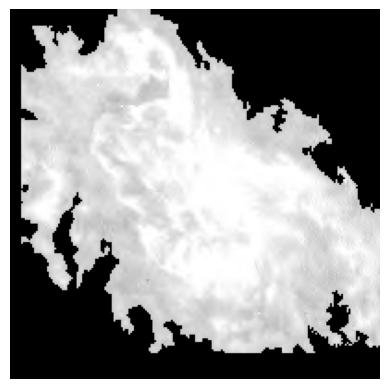

In [35]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_SEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [36]:
#SEP - Western face
#NSEP - Eastern

# NSEP

## NSEP Mask

In [37]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)



Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

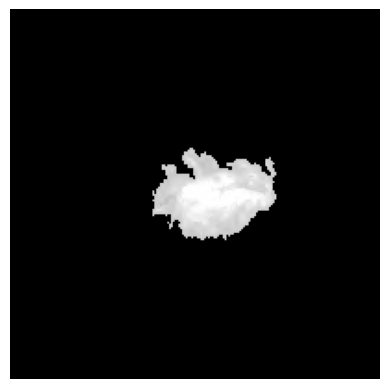

In [38]:
# Display the image corresponding to index 0
plt.imshow(cropped_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [39]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Define a function to process and store cropped images as NumPy arrays
cropped_images_AR_NSEP = {}
index_counter = 0

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)

    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # Convert to grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # Convert to NumPy array

            # Threshold to obtain the brightest parts
            _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Keep only the largest contour
            contour_areas = [cv2.contourArea(contour) for contour in contours]
            largest_contour_index = np.argmax(contour_areas)
            largest_contour = contours[largest_contour_index]

            # Create a blank mask image
            mask = np.zeros_like(cropped_image)

            # Draw largest contour on the mask
            cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

            # Apply the mask to the cropped image
            result = np.where(mask != 0, cropped_image, 0)

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    # Calculate the center of mass (centroid) of the brightest region
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Shift the image so that the centroid is at the center
    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    # Store the adjusted image
    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Optionally, visualize the adjusted image
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted Image {index}")
    # plt.axis('off')
    # plt.show()


Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

In [40]:
import requests
from PIL import Image
import csv
from datetime import datetime
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to convert date format
def convert_date_format(date):
    date_obj = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
    return date_obj.strftime("%Y-%m-%dT%H:%M:%SZ")

# Store cropped images
cropped_images_AR_NSEP = {}
index_counter = 0

# ===== SWITCH: Use adaptive or global threshold =====
USE_ADAPTIVE = False   # <--- set False to use fixed threshold again

def store_cropped_image(date, coord1, coord2):
    global index_counter
    base_url = "https://api.helioviewer.org/v2/"
    endpoint = "getJP2Image"
    source_id = "3"

    formatted_date = convert_date_format(date)
    url = f"{base_url}{endpoint}/?date={formatted_date}&sourceId={source_id}"
    response = requests.get(url)

    if response.status_code == 200:
        try:
            img = Image.open(io.BytesIO(response.content)).convert('L')  # grayscale

            metadata = {
                'event_coord1': coord1 / 2.63,
                'event_coord2': coord2 / 2.63,
            }

            width_of_rectangle_arcsec = width_MBR
            height_of_rectangle_arcsec = height_MBR

            center_x = img.width // 2
            center_y = img.height // 2

            width_of_rectangle_pixels = width_of_rectangle_arcsec
            height_of_rectangle_pixels = height_of_rectangle_arcsec

            x1 = center_x + int(metadata['event_coord1']) - (width_of_rectangle_pixels // 2)
            y1 = center_y - int(metadata['event_coord2']) - (height_of_rectangle_pixels // 2)
            x2 = x1 + width_of_rectangle_pixels
            y2 = y1 + height_of_rectangle_pixels

            cropped_image = np.array(img.crop((x1, y1, x2, y2)))  # NumPy array

            # Threshold
            if USE_ADAPTIVE:
                thresh = cv2.adaptiveThreshold(
                    cropped_image.astype(np.uint8),
                    255,
                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                    cv2.THRESH_BINARY,
                    35,   # block size (odd number, tune this)
                    5     # constant C (tune this)
                )
            else:
                _, thresh = cv2.threshold(cropped_image, 200, 255, cv2.THRESH_BINARY)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if contours:
                # Keep only the largest contour
                contour_areas = [cv2.contourArea(contour) for contour in contours]
                largest_contour_index = np.argmax(contour_areas)
                largest_contour = contours[largest_contour_index]

                # Create a blank mask image
                mask = np.zeros_like(cropped_image)

                # Draw largest contour on the mask
                cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)

                # Apply the mask to the cropped image
                result = np.where(mask != 0, cropped_image, 0)
            else:
                result = cropped_image  # fallback

            # Store the processed image
            cropped_images_AR_NSEP[index_counter] = result
            index_counter += 1
            print(f"Cropped image for {date} processed and stored as NumPy array with index {index_counter - 1}.")
        except Exception as e:
            print(f"Error processing image for {date}: {e}")
    else:
        print(f"Failed to fetch image for {date} with status code:", response.status_code)

# Open CSV file and process data
with open('data/NSEP_date_P2_Dates_AR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        date = row['NSEP']
        coord1 = float(row['Coord1'])
        coord2 = float(row['Coord2'])
        store_cropped_image(date, coord1, coord2)

# Adjust the bright shapes to the center of each image
adjusted_images_AR_NSEP = {}

for index, image in cropped_images_AR_NSEP.items():
    M = cv2.moments(image)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    rows, cols = image.shape
    shiftX = cols // 2 - cX
    shiftY = rows // 2 - cY
    M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
    adjusted_image = cv2.warpAffine(image, M, (cols, rows))

    adjusted_images_AR_NSEP[index] = adjusted_image

    # # Debug visualization
    # plt.imshow(adjusted_image, cmap='gray')
    # plt.title(f"Adjusted NSEP Image {index}")
    # plt.axis('off')
    # plt.show()

Cropped image for 1997-09-24 02:40:00 processed and stored as NumPy array with index 0.
Cropped image for 1997-11-03 10:15:00 processed and stored as NumPy array with index 1.
Cropped image for 1997-11-27 12:55:00 processed and stored as NumPy array with index 2.
Cropped image for 1997-11-29 22:25:00 processed and stored as NumPy array with index 3.
Cropped image for 1998-04-27 08:55:00 processed and stored as NumPy array with index 4.
Cropped image for 1998-05-10 13:10:00 processed and stored as NumPy array with index 5.
Cropped image for 1998-11-22 16:10:00 processed and stored as NumPy array with index 6.
Cropped image for 1998-11-23 10:55:00 processed and stored as NumPy array with index 7.
Cropped image for 1999-03-16 21:30:00 processed and stored as NumPy array with index 8.
Cropped image for 1999-04-04 05:15:00 processed and stored as NumPy array with index 9.
Cropped image for 1999-05-08 14:20:00 processed and stored as NumPy array with index 10.
Cropped image for 1999-06-17 16

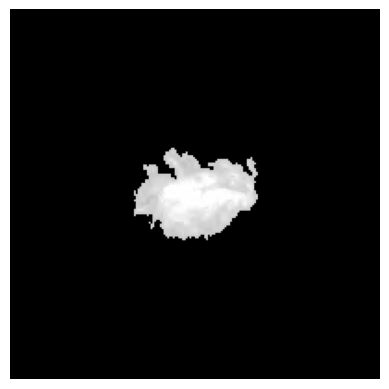

In [41]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


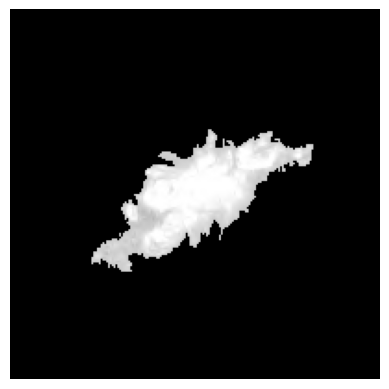

In [42]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[1], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


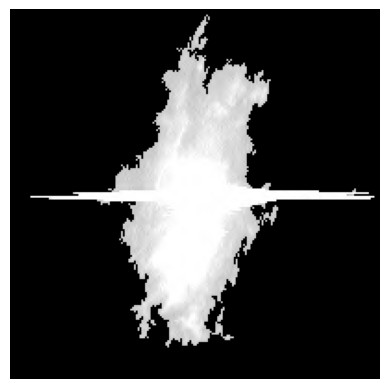

In [43]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[2], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


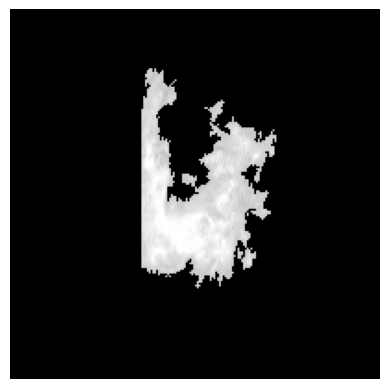

In [44]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[3], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


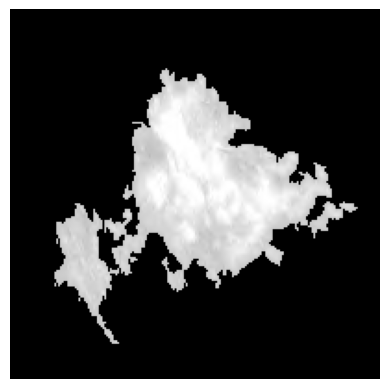

In [45]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[4], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


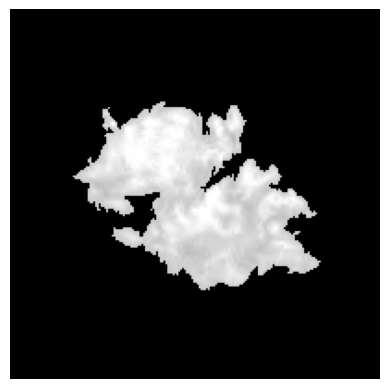

In [46]:
# Display the image corresponding to index 0
plt.imshow(adjusted_images_AR_NSEP[5], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


# Attention Optimization

In [61]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

rf = RandomForestClassifier(n_estimators=80, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    rf.fit(X[train_idx], y[train_idx])
    preds = rf.predict(X[test_idx])

    accuracy_scores.append(accuracy_score(y[test_idx], preds))
    f1_scores.append(f1_score(y[test_idx], preds, average="weighted"))
    precision_scores.append(precision_score(y[test_idx], preds, average="macro"))
    recall_scores.append(recall_score(y[test_idx], preds, average="macro"))

    tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores.append(tss)

    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores.append(hss)

print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Mean Accuracy: 70.29%
Mean F1 Score: 0.70
Mean TSS: 0.40
Mean HSS: 0.40
All Accuracies: [0.6, 0.7333333333333333, 0.8, 0.6666666666666666, 0.7142857142857143]


In [66]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()

        backbone = models.mobilenet_v3_small(pretrained=True)

        # Extract convolutional feature extractor
        self.features = backbone.features  # (B, 576, H, W)

        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(in_channels=576)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x


model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

rf = RandomForestClassifier(n_estimators=80, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    rf.fit(X[train_idx], y[train_idx])
    preds = rf.predict(X[test_idx])

    accuracy_scores.append(accuracy_score(y[test_idx], preds))
    f1_scores.append(f1_score(y[test_idx], preds, average="weighted"))
    precision_scores.append(precision_score(y[test_idx], preds, average="macro"))
    recall_scores.append(recall_score(y[test_idx], preds, average="macro"))

    tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores.append(tss)

    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores.append(hss)

print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Mean Accuracy: 55.43%
Mean F1 Score: 0.54
Mean TSS: 0.11
Mean HSS: 0.11
All Accuracies: [0.5333333333333333, 0.5333333333333333, 0.6, 0.5333333333333333, 0.5714285714285714]


In [65]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()

        backbone = models.mobilenet_v3_large(pretrained=True)

        # Extract convolutional feature extractor
        self.features = backbone.features  # (B, 576, H, W)

        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(in_channels=960)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x


model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

rf = RandomForestClassifier(n_estimators=80, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    rf.fit(X[train_idx], y[train_idx])
    preds = rf.predict(X[test_idx])

    accuracy_scores.append(accuracy_score(y[test_idx], preds))
    f1_scores.append(f1_score(y[test_idx], preds, average="weighted"))
    precision_scores.append(precision_score(y[test_idx], preds, average="macro"))
    recall_scores.append(recall_score(y[test_idx], preds, average="macro"))

    tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores.append(tss)

    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores.append(hss)

print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)


Mean Accuracy: 64.95%
Mean F1 Score: 0.65
Mean TSS: 0.30
Mean HSS: 0.30
All Accuracies: [0.6666666666666666, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.7142857142857143]


# Models

In [1]:
from PIL import Image
import torch
import torchvision

print("Pillow OK")
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)

: 

In [27]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

rf = RandomForestClassifier(n_estimators=80, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    rf.fit(X[train_idx], y[train_idx])
    preds = rf.predict(X[test_idx])

    accuracy_scores.append(accuracy_score(y[test_idx], preds))
    f1_scores.append(f1_score(y[test_idx], preds, average="weighted"))
    precision_scores.append(precision_score(y[test_idx], preds, average="macro"))
    recall_scores.append(recall_score(y[test_idx], preds, average="macro"))

    tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores.append(tss)

    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores.append(hss)

print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)


Mean Accuracy: 70.29%
Mean F1 Score: 0.70
Mean TSS: 0.41
Mean HSS: 0.40
All Accuracies: [0.6666666666666666, 0.6666666666666666, 0.8, 0.6666666666666666, 0.7142857142857143]


In [28]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled  # (B, C)

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        # Freeze CNN weights (small dataset)
        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

svm = SVC(kernel="rbf", probability=False)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(prec)
    recall_scores.append(rec)
    tss_scores.append(tss)
    hss_scores.append(hss)

print("SVM + CNN Attention Results")
print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM + CNN Attention Results
Mean Accuracy: 58.00%
Mean F1 Score: 0.55
Mean TSS: 0.16
Mean HSS: 0.16
All Accuracies: [0.6, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667, 0.5]


In [29]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled  # (B, C)

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        # Freeze CNN weights (small dataset)
        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )

    tsss.append(tss)
    hsss.append(hss)

print("XGBoost + CNN Attention Results")
print("Mean Accuracy:", np.mean(accs) * 100)
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", accs)

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [09:40:44] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py

XGBoost + CNN Attention Results
Mean Accuracy: 60.76190476190476
Mean F1 Score: 0.6031349206349206
Mean TSS: 0.21428571428571433
Mean HSS: 0.21311691336144062
All Accuracy: [0.6, 0.6, 0.7333333333333333, 0.5333333333333333, 0.5714285714285714]


C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [09:40:45] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [09:40:45] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled  # (B, C)

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        # Freeze CNN weights (small dataset)
        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )

    tsss.append(tss)
    hsss.append(hss)

print("MLP + CNN Attention Results")
print("Mean Accuracy:", np.mean(accs))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", accs)


C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MLP + CNN Attention Results
Mean Accuracy: 0.5523809523809524
Mean F1 Score: 0.5392822966507176
Mean TSS: 0.09285714285714287
Mean HSS: 0.09264982196499613
All Accuracy: [0.6666666666666666, 0.5333333333333333, 0.5333333333333333, 0.6, 0.42857142857142855]


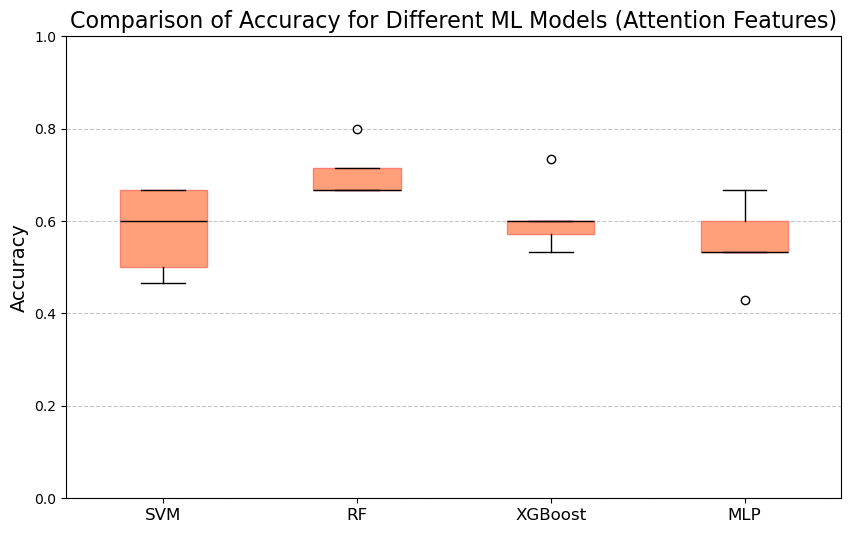

In [32]:
import matplotlib.pyplot as plt

accuracy_data = {
    "SVM": [0.6, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667, 0.5],
    "RF": [0.6666666666666666, 0.6666666666666666, 0.8, 0.6666666666666666, 0.7142857142857143],
    "XGBoost": [0.6, 0.6, 0.7333333333333333, 0.5333333333333333, 0.5714285714285714],
    "MLP": [0.6666666666666666, 0.5333333333333333, 0.5333333333333333, 0.6, 0.42857142857142855]
}

plt.figure(figsize=(10, 6))
plt.boxplot(accuracy_data.values(), patch_artist=True, 
            boxprops=dict(facecolor='lightsalmon', color='salmon'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Comparison of Accuracy for Different ML Models (Attention Features)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()

#463

# Optimized Models

## SVM

In [43]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled  # (B, C)

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        # Freeze CNN weights (small dataset)
        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

svm = SVC(kernel="rbf", probability=False)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(prec)
    recall_scores.append(rec)
    tss_scores.append(tss)
    hss_scores.append(hss)

print("SVM + CNN Attention Results")
print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM + CNN Attention Results
Mean Accuracy: 66.10%
Mean F1 Score: 0.65
Mean TSS: 0.31
Mean HSS: 0.32
All Accuracies: [0.6, 0.6666666666666666, 0.6666666666666666, 0.8, 0.5714285714285714]


In [48]:
from itertools import product
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

svm_param_grid = {
    "kernel": ["rbf", "linear"],
    "C": [0.001, 0.01, 0.1, 1, 10, 20, 30, 50, 100, 300, 1000, 3000],
    "gamma": ['scale', 'auto', 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]  # only used for RBF
}

for kernel, C, gamma in product(
    svm_param_grid["kernel"],
    svm_param_grid["C"],
    svm_param_grid["gamma"]
):

    accs, f1s, tsss, hsss = [], [], [], []

    svm = SVC(
        kernel=kernel,
        C=C,
        gamma=gamma,
        random_state=42
    )

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        svm.fit(X_train, y_train)
        preds = svm.predict(X_test)

        accs.append(accuracy_score(y_test, preds))
        f1s.append(f1_score(y_test, preds, average="weighted"))

        tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        tsss.append(tss)
        hsss.append(hss)

    results.append({
        "params": {
            "kernel": kernel,
            "C": C,
            "gamma": gamma
        },
        "mean_accuracy": np.mean(accs),
        "mean_f1": np.mean(f1s),
        "mean_tss": np.mean(tsss),
        "mean_hss": np.mean(hsss),
        "accuracy_folds": accs,
        "tss_folds": tsss
    })

best_acc = max(results, key=lambda x: x["mean_accuracy"])

print("\nBest SVM + Attention by Accuracy\n")
print("Hyperparameters:")
for k, v in best_acc["params"].items():
    print(f"  {k}: {v}")

print(f"\nMean Accuracy: {best_acc['mean_accuracy'] * 100:.2f}%")
print(f"Mean TSS: {best_acc['mean_tss']:.3f}")

print("\nAccuracy per fold:")
print(best_acc["accuracy_folds"])

print("\nTSS per fold:")
print(best_acc["tss_folds"])


Best SVM + Attention by Accuracy

Hyperparameters:
  kernel: rbf
  C: 10
  gamma: 0.1

Mean Accuracy: 72.86%
Mean TSS: 0.468

Accuracy per fold:
[0.6, 0.7333333333333333, 0.8, 0.8666666666666667, 0.6428571428571429]

TSS per fold:
[np.float64(0.25), np.float64(0.4642857142857143), np.float64(0.6071428571428572), np.float64(0.7321428571428572), np.float64(0.2857142857142857)]


Best SVM + Attention by Accuracy

Hyperparameters:
  kernel: rbf
  C: 10
  gamma: 0.1

Mean Accuracy: 72.86%
Mean TSS: 0.468

Accuracy per fold:
[0.6, 0.7333333333333333, 0.8, 0.8666666666666667, 0.6428571428571429]

TSS per fold:
[np.float64(0.25), np.float64(0.4642857142857143), np.float64(0.6071428571428572), np.float64(0.7321428571428572), np.float64(0.2857142857142857)]

## Random Forest

In [7]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

rf = RandomForestClassifier(n_estimators=80, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
tss_scores = []
hss_scores = []

for train_idx, test_idx in skf.split(X, y):
    rf.fit(X[train_idx], y[train_idx])
    preds = rf.predict(X[test_idx])

    accuracy_scores.append(accuracy_score(y[test_idx], preds))
    f1_scores.append(f1_score(y[test_idx], preds, average="weighted"))
    precision_scores.append(precision_score(y[test_idx], preds, average="macro"))
    recall_scores.append(recall_score(y[test_idx], preds, average="macro"))

    tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    tss_scores.append(tss)

    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )
    hss_scores.append(hss)

print(f"Mean Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")
print(f"Mean TSS: {np.mean(tss_scores):.2f}")
print(f"Mean HSS: {np.mean(hss_scores):.2f}")
print("All Accuracies:", accuracy_scores)


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'adjusted_images_AR_NSEP' is not defined

In [29]:
from itertools import product
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    "n_estimators": [25, 50, 75, 100, 125, 150, 175, 200, 250, 300],
    "max_depth": [None],
    "min_samples_split": [10],
    "min_samples_leaf": [4],
    "max_features": ["log2"]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for (n_estimators,
     max_depth,
     min_samples_split,
     min_samples_leaf,
     max_features) in product(*rf_param_grid.values()):

    accs, f1s, tsss, hsss = [], [], [], []

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    for train_idx, test_idx in skf.split(X, y):
        rf.fit(X[train_idx], y[train_idx])
        preds = rf.predict(X[test_idx])

        accs.append(accuracy_score(y[test_idx], preds))
        f1s.append(f1_score(y[test_idx], preds, average="weighted"))

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        tsss.append(tss)
        hsss.append(hss)

    results.append({
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "max_features": max_features,
        "mean_accuracy": np.mean(accs),
        "mean_f1": np.mean(f1s),
        "mean_tss": np.mean(tsss),
        "mean_hss": np.mean(hsss)
    })


In [30]:
best_tss = max(results, key=lambda x: x["mean_tss"])
print("Best by TSS:")
for k, v in best_tss.items():
    print(f"{k}: {v}")
best_acc = max(results, key=lambda x: x["mean_accuracy"])
print("Best by Accuracy:")
for k, v in best_acc.items():
    print(f"{k}: {v}")

Best by TSS:
n_estimators: 50
max_depth: None
min_samples_split: 10
min_samples_leaf: 4
max_features: log2
mean_accuracy: 0.7180952380952381
mean_f1: 0.7142989417989417
mean_tss: 0.4357142857142858
mean_hss: 0.43215752575324073
Best by Accuracy:
n_estimators: 50
max_depth: None
min_samples_split: 10
min_samples_leaf: 4
max_features: log2
mean_accuracy: 0.7180952380952381
mean_f1: 0.7142989417989417
mean_tss: 0.4357142857142858
mean_hss: 0.43215752575324073


In [31]:
from itertools import product
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    "n_estimators": [50],
    "max_depth": [None, 1, 3, 5, 7, 10, 13, 15, 17, 20],
    "min_samples_split": [10],
    "min_samples_leaf": [4],
    "max_features": ["sqrt", "log2"]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for (n_estimators,
     max_depth,
     min_samples_split,
     min_samples_leaf,
     max_features) in product(*rf_param_grid.values()):

    accs, f1s, tsss, hsss = [], [], [], []

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    for train_idx, test_idx in skf.split(X, y):
        rf.fit(X[train_idx], y[train_idx])
        preds = rf.predict(X[test_idx])

        accs.append(accuracy_score(y[test_idx], preds))
        f1s.append(f1_score(y[test_idx], preds, average="weighted"))

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        tsss.append(tss)
        hsss.append(hss)

    results.append({
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "max_features": max_features,
        "mean_accuracy": np.mean(accs),
        "mean_f1": np.mean(f1s),
        "mean_tss": np.mean(tsss),
        "mean_hss": np.mean(hsss)
    })


In [32]:
best_tss = max(results, key=lambda x: x["mean_tss"])
print("Best by TSS:")
for k, v in best_tss.items():
    print(f"{k}: {v}")
best_acc = max(results, key=lambda x: x["mean_accuracy"])
print("Best by Accuracy:")
for k, v in best_acc.items():
    print(f"{k}: {v}")

Best by TSS:
n_estimators: 50
max_depth: None
min_samples_split: 10
min_samples_leaf: 4
max_features: log2
mean_accuracy: 0.7180952380952381
mean_f1: 0.7142989417989417
mean_tss: 0.4357142857142858
mean_hss: 0.43215752575324073
Best by Accuracy:
n_estimators: 50
max_depth: None
min_samples_split: 10
min_samples_leaf: 4
max_features: log2
mean_accuracy: 0.7180952380952381
mean_f1: 0.7142989417989417
mean_tss: 0.4357142857142858
mean_hss: 0.43215752575324073


In [34]:
from itertools import product
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    "n_estimators": [50],
    "max_depth": [None],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_leaf": [4],
    "max_features": ["log2"]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for (n_estimators,
     max_depth,
     min_samples_split,
     min_samples_leaf,
     max_features) in product(*rf_param_grid.values()):

    accs, f1s, tsss, hsss = [], [], [], []

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    for train_idx, test_idx in skf.split(X, y):
        rf.fit(X[train_idx], y[train_idx])
        preds = rf.predict(X[test_idx])

        accs.append(accuracy_score(y[test_idx], preds))
        f1s.append(f1_score(y[test_idx], preds, average="weighted"))

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        tsss.append(tss)
        hsss.append(hss)

    results.append({
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "max_features": max_features,
        "mean_accuracy": np.mean(accs),
        "mean_f1": np.mean(f1s),
        "mean_tss": np.mean(tsss),
        "mean_hss": np.mean(hsss)
    })


In [35]:
best_tss = max(results, key=lambda x: x["mean_tss"])
print("Best by TSS:")
for k, v in best_tss.items():
    print(f"{k}: {v}")
best_acc = max(results, key=lambda x: x["mean_accuracy"])
print("Best by Accuracy:")
for k, v in best_acc.items():
    print(f"{k}: {v}")

Best by TSS:
n_estimators: 50
max_depth: None
min_samples_split: 10
min_samples_leaf: 4
max_features: log2
mean_accuracy: 0.7180952380952381
mean_f1: 0.7142989417989417
mean_tss: 0.4357142857142858
mean_hss: 0.43215752575324073
Best by Accuracy:
n_estimators: 50
max_depth: None
min_samples_split: 10
min_samples_leaf: 4
max_features: log2
mean_accuracy: 0.7180952380952381
mean_f1: 0.7142989417989417
mean_tss: 0.4357142857142858
mean_hss: 0.43215752575324073


In [40]:
from itertools import product
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    "n_estimators": [50],
    "max_depth": [None],
    "min_samples_split": [10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "max_features": ["log2"]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for (n_estimators,
     max_depth,
     min_samples_split,
     min_samples_leaf,
     max_features) in product(*rf_param_grid.values()):

    accs, f1s, tsss, hsss = [], [], [], []

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    for train_idx, test_idx in skf.split(X, y):
        rf.fit(X[train_idx], y[train_idx])
        preds = rf.predict(X[test_idx])

        accs.append(accuracy_score(y[test_idx], preds))
        f1s.append(f1_score(y[test_idx], preds, average="weighted"))

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        tsss.append(tss)
        hsss.append(hss)

    results.append({
        "params": {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf,
            "max_features": max_features,
        },
        "mean_accuracy": np.mean(accs),
        "mean_tss": np.mean(tsss),
        "accuracy_folds": accs,
        "tss_folds": tsss
    })


In [41]:
best_acc = max(results, key=lambda x: x["mean_accuracy"])

print("\nBest by Accuracy\n")
print("Hyperparameters:")
for k, v in best_acc["params"].items():
    print(f"  {k}: {v}")

print(f"\nMean Accuracy: {best_acc['mean_accuracy'] * 100:.2f}%")
print(f"Mean TSS: {best_acc['mean_tss']:.3f}")

print("\nAccuracy per fold:")
print(best_acc["accuracy_folds"])

print("\nTSS per fold:")
print(best_acc["tss_folds"])



Best by Accuracy

Hyperparameters:
  n_estimators: 50
  max_depth: None
  min_samples_split: 10
  min_samples_leaf: 4
  max_features: log2

Mean Accuracy: 71.81%
Mean TSS: 0.436

Accuracy per fold:
[0.6666666666666666, 0.4666666666666667, 0.8666666666666667, 0.7333333333333333, 0.8571428571428571]

TSS per fold:
[np.float64(0.3392857142857143), np.float64(-0.0892857142857143), np.float64(0.75), np.float64(0.4642857142857143), np.float64(0.7142857142857143)]


In [42]:
best_tss = max(results, key=lambda x: x["mean_tss"])

print("\nBest by TSS\n")
print("Hyperparameters:")
for k, v in best_tss["params"].items():
    print(f"  {k}: {v}")

print(f"\nMean Accuracy: {best_tss['mean_accuracy'] * 100:.2f}%")
print(f"Mean TSS: {best_tss['mean_tss']:.3f}")

print("\nAccuracy per fold:")
print(best_tss["accuracy_folds"])

print("\nTSS per fold:")
print(best_tss["tss_folds"])


Best by TSS

Hyperparameters:
  n_estimators: 50
  max_depth: None
  min_samples_split: 10
  min_samples_leaf: 4
  max_features: log2

Mean Accuracy: 71.81%
Mean TSS: 0.436

Accuracy per fold:
[0.6666666666666666, 0.4666666666666667, 0.8666666666666667, 0.7333333333333333, 0.8571428571428571]

TSS per fold:
[np.float64(0.3392857142857143), np.float64(-0.0892857142857143), np.float64(0.75), np.float64(0.4642857142857143), np.float64(0.7142857142857143)]


## MLP

In [50]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled  # (B, C)

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        # Freeze CNN weights (small dataset)
        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )

    tsss.append(tss)
    hsss.append(hss)

print("MLP + CNN Attention Results")
print("Mean Accuracy:", np.mean(accs))
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", accs)

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MLP + CNN Attention Results
Mean Accuracy: 0.5371428571428571
Mean F1 Score: 0.5276948933419521
Mean TSS: 0.06071428571428572
Mean HSS: 0.0625804375804376
All Accuracy: [0.6, 0.6, 0.6666666666666666, 0.5333333333333333, 0.2857142857142857]


In [51]:
from itertools import product
from sklearn.neural_network import MLPClassifier

param_grid = {
    "hidden_layer_sizes": [(64,), (128,), (256,), (128, 64), (256, 128), (256, 128, 64), (512, 256)],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate_init": [1e-3, 1e-4],
    "solver": ["adam", "lbfgs"]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = MLPClassifier(
            **param_dict,
            activation="relu",
            max_iter=700,
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    # Optimization target (same logic as before)
    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nMLP + Attention \n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyCon


MLP + Attention 

Best Hyperparameters:
  hidden_layer_sizes: (128, 64)
  alpha: 0.0001
  learning_rate_init: 0.001
  solver: lbfgs

Per-fold Accuracy: [0.6666666666666666, 0.6666666666666666, 0.8, 0.6, 0.5]
Per-fold TSS: [np.float64(0.3392857142857143), np.float64(0.30357142857142855), np.float64(0.5714285714285714), np.float64(0.2142857142857143), np.float64(0.0)]

Mean Accuracy: 0.6466666666666667
Mean TSS: 0.2857142857142857


In [52]:
from itertools import product
from sklearn.neural_network import MLPClassifier

param_grid = {
    "hidden_layer_sizes": [(128, 64)],
    "alpha": [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    "learning_rate_init": [1e-4, 3e-4, 1e-3, 3e-3],
    "solver": ["adam", "lbfgs"],
    "max_iter": [500]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = MLPClassifier(
            **param_dict,
            activation="relu",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    # Optimization target (same logic as before)
    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nMLP + Attention \n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyCon


MLP + Attention 

Best Hyperparameters:
  hidden_layer_sizes: (128, 64)
  alpha: 0.0001
  learning_rate_init: 0.0001
  solver: lbfgs
  max_iter: 500

Per-fold Accuracy: [0.6666666666666666, 0.6666666666666666, 0.8, 0.6, 0.5]
Per-fold TSS: [np.float64(0.3392857142857143), np.float64(0.30357142857142855), np.float64(0.5714285714285714), np.float64(0.2142857142857143), np.float64(0.0)]

Mean Accuracy: 0.6466666666666667
Mean TSS: 0.2857142857142857


In [ ]:
from itertools import product
from sklearn.neural_network import MLPClassifier

param_grid = {
    "hidden_layer_sizes": [(128, 64)],
    "alpha": [1e-4],
    "learning_rate_init": [1e-4],
    "solver": ["adam", "lbfgs"],
    "max_iter": [200, 250, 300, 500, 600, 700, 800, 900, 1000]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = MLPClassifier(
            **param_dict,
            activation="relu",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    # Optimization target (same logic as before)
    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nMLP + Attention \n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))

C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shiva\MyCon

MLP + Attention 

Best Hyperparameters:
  hidden_layer_sizes: (128, 64)
  alpha: 0.0001
  learning_rate_init: 0.0001
  solver: lbfgs
  max_iter: 200

Per-fold Accuracy: [0.6666666666666666, 0.6666666666666666, 0.8, 0.6, 0.5]
Per-fold TSS: [np.float64(0.3392857142857143), np.float64(0.30357142857142855), np.float64(0.5714285714285714), np.float64(0.2142857142857143), np.float64(0.0)]

Mean Accuracy: 0.6466666666666667
Mean TSS: 0.2857142857142857

## XGBoost

In [47]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # 🔥 FIX
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class SpatialAttentionPooling(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.attention = nn.Conv2d(in_channels, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, H, W)
        weights = torch.softmax(
            self.attention(x).view(x.size(0), -1),
            dim=1
        )
        weights = weights.view(x.size(0), 1, x.size(2), x.size(3))
        pooled = (x * weights).sum(dim=(2, 3))
        return pooled  # (B, C)

class CNNWithAttention(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        # Freeze CNN weights (small dataset)
        for param in self.features.parameters():
            param.requires_grad = False

        self.attention_pool = SpatialAttentionPooling(512)

    def forward(self, x):
        x = self.features(x)
        x = self.attention_pool(x)
        return x

model = CNNWithAttention().to(device)
model.eval()

def extract_attention_features(image):
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        features = model(image)
    return features.cpu().numpy().squeeze()

X, y = [], []

for img in adjusted_images_AR_NSEP.values():
    X.append(extract_attention_features(img))
    y.append(0)

for img in adjusted_images_AR_SEP.values():
    X.append(extract_attention_features(img))
    y.append(1)

X = np.array(X)
y = np.array(y)

clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs, f1s, tsss, hsss = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * ((tp * tn) - (fn * fp))) / (
        ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
    )

    tsss.append(tss)
    hsss.append(hss)

print("XGBoost + CNN Attention Results")
print("Mean Accuracy:", np.mean(accs) * 100)
print("Mean F1 Score:", np.mean(f1s))
print("Mean TSS:", np.mean(tsss))
print("Mean HSS:", np.mean(hsss))
print("All Accuracy:", accs)

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:49:21] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py

XGBoost + CNN Attention Results
Mean Accuracy: 59.61904761904761
Mean F1 Score: 0.5943966817496229
Mean TSS: 0.18928571428571428
Mean HSS: 0.19068660949191923
All Accuracy: [0.6, 0.26666666666666666, 0.6666666666666666, 0.7333333333333333, 0.7142857142857143]


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:49:22] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:49:22] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8],
    "learning_rate": [0.01],
    "n_estimators": [300],
    "subsample": [1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:46:13] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:46:13] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:46:13] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:46:14] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  learning_rate: 0.01
  n_estimators: 300
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.4666666666666667, 0.6, 0.7333333333333333, 0.5714285714285714]
Per-fold TSS: [np.float64(0.1964285714285714), np.float64(-0.07142857142857145), np.float64(0.2142857142857143), np.float64(0.48214285714285715), np.float64(0.14285714285714285)]

Mean Accuracy: 0.5942857142857143
Mean TSS: 0.19285714285714284


In [50]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "learning_rate": [0.01],
    "n_estimators": [300],
    "subsample": [1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:52:31] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:52:32] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:52:32] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:52:32] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.01
  n_estimators: 300
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.5333333333333333, 0.6, 0.7333333333333333, 0.7142857142857143]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.05357142857142855), np.float64(0.2142857142857143), np.float64(0.44642857142857145), np.float64(0.42857142857142855)]

Mean Accuracy: 0.6361904761904762
Mean TSS: 0.27142857142857146


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:52:39] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [10:52:39] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [53]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [6],
    "learning_rate": [0.005, 0.001, 0.01, 0.03, 0.05, 0.01, 0.3, 0.1],
    "n_estimators": [300],
    "subsample": [1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:10:29] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:10:30] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:10:30] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:10:30] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.03
  n_estimators: 300
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.5333333333333333, 0.6666666666666666, 0.8, 0.6428571428571429]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.05357142857142855), np.float64(0.3392857142857143), np.float64(0.5892857142857143), np.float64(0.28571428571428575)]

Mean Accuracy: 0.6485714285714285
Mean TSS: 0.2964285714285715


In [54]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [6],
    "learning_rate": [0.03],
    "n_estimators": [25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800],
    "subsample": [1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:11:35] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:11:35] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:11:36] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:11:36] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.03
  n_estimators: 75
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.6666666666666666, 0.6, 0.7333333333333333, 0.7857142857142857]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.3214285714285714), np.float64(0.2142857142857143), np.float64(0.44642857142857145), np.float64(0.5714285714285714)]

Mean Accuracy: 0.6771428571428572
Mean TSS: 0.35357142857142854


In [55]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [6],
    "learning_rate": [0.03],
    "n_estimators": [75],
    "subsample": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:12:40] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:12:40] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:12:40] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:12:40] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.03
  n_estimators: 75
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.6666666666666666, 0.6, 0.7333333333333333, 0.7857142857142857]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.3214285714285714), np.float64(0.2142857142857143), np.float64(0.44642857142857145), np.float64(0.5714285714285714)]

Mean Accuracy: 0.6771428571428572
Mean TSS: 0.35357142857142854


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:12:41] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [56]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [6],
    "learning_rate": [0.03],
    "n_estimators": [75],
    "subsample": [1.0],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:37] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:37] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:37] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:37] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.03
  n_estimators: 75
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.6666666666666666, 0.6, 0.7333333333333333, 0.7857142857142857]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.3214285714285714), np.float64(0.2142857142857143), np.float64(0.44642857142857145), np.float64(0.5714285714285714)]

Mean Accuracy: 0.6771428571428572
Mean TSS: 0.35357142857142854


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:39] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:39] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:39] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:13:39] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "

In [57]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [6],
    "learning_rate": [0.03],
    "n_estimators": [75],
    "subsample": [1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [0.0, 0.5, 1.0, 1.5, 3.0, 4.0, 5.0, 7.5, 10.0],
    "reg_alpha": [0.0, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:14:52] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:14:52] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:14:52] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:14:52] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.03
  n_estimators: 75
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0

Per-fold Accuracy: [0.6, 0.6666666666666666, 0.6, 0.7333333333333333, 0.7857142857142857]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.3214285714285714), np.float64(0.2142857142857143), np.float64(0.44642857142857145), np.float64(0.5714285714285714)]

Mean Accuracy: 0.6771428571428572
Mean TSS: 0.35357142857142854


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:08] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:09] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from itertools import product
from xgboost import XGBClassifier

param_grid = {
    "max_depth": [2],
    "min_child_weight": [6],
    "learning_rate": [0.03],
    "n_estimators": [75],
    "subsample": [1.0],
    "colsample_bytree": [0.5],
    "reg_lambda": [1.0],
    "reg_alpha": [1.0],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
best_fold_metrics = None

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    accs, tsss, f1s, hsss = [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        clf = XGBClassifier(
            **param_dict,
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

        clf.fit(X[train_idx], y[train_idx])
        preds = clf.predict(X[test_idx])

        acc = accuracy_score(y[test_idx], preds)
        f1 = f1_score(y[test_idx], preds, average="weighted")

        tn, fp, fn, tp = confusion_matrix(y[test_idx], preds).ravel()
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = (2 * ((tp * tn) - (fn * fp))) / (
            ((tp + fn) * (fn + tn)) + ((fp + tn) * (tp + fp))
        )

        accs.append(acc)
        f1s.append(f1)
        tsss.append(tss)
        hsss.append(hss)

    score = np.mean(tsss) + 0.5 * np.mean(accs)

    if score > best_score:
        best_score = score
        best_params = param_dict
        best_fold_metrics = {
            "accuracy": accs,
            "f1": f1s,
            "tss": tsss,
            "hss": hsss
        }

print("\nXGBoost + CNN Attention\n")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("\nPer-fold Accuracy:", best_fold_metrics["accuracy"])
print("Per-fold TSS:", best_fold_metrics["tss"])

print("\nMean Accuracy:", np.mean(best_fold_metrics["accuracy"]))
print("Mean TSS:", np.mean(best_fold_metrics["tss"]))
 

c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:47] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:48] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:48] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:48] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "


XGBoost + CNN Attention

Best Hyperparameters:
  max_depth: 2
  min_child_weight: 6
  learning_rate: 0.03
  n_estimators: 75
  subsample: 1.0
  colsample_bytree: 0.5
  reg_lambda: 1.0
  reg_alpha: 1.0
  gamma: 0.0

Per-fold Accuracy: [0.6, 0.6666666666666666, 0.6, 0.7333333333333333, 0.7857142857142857]
Per-fold TSS: [np.float64(0.2142857142857143), np.float64(0.3214285714285714), np.float64(0.2142857142857143), np.float64(0.44642857142857145), np.float64(0.5714285714285714)]

Mean Accuracy: 0.6771428571428572
Mean TSS: 0.35357142857142854


c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:48] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:48] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:49] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\shiva\MyConda\envs\sepvision\lib\site-packages\xgboost\training.py:199: UserWarning: [12:15:49] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "

## Results

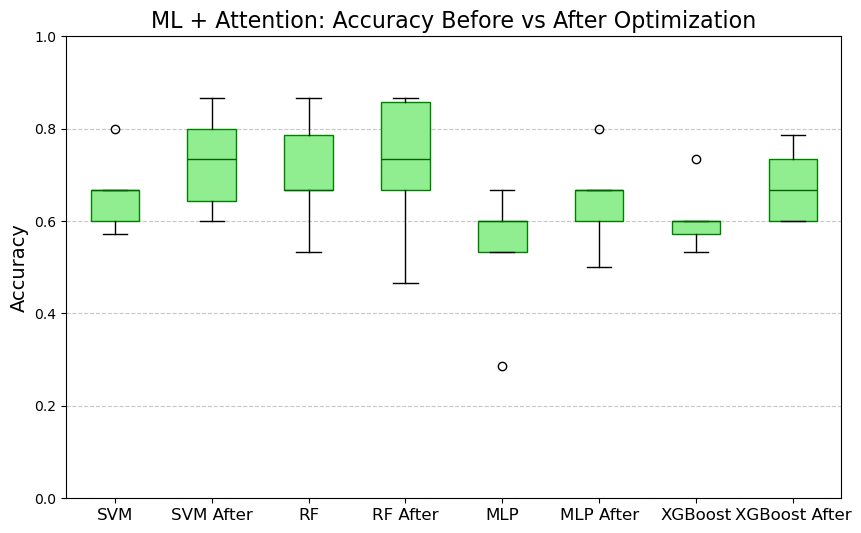

In [60]:
import matplotlib.pyplot as plt

accuracy_data = {
    "SVM": [0.6, 0.6666666666666666, 0.6666666666666666, 0.8, 0.5714285714285714],
    "SVM After": [0.6, 0.7333333333333333, 0.8, 0.8666666666666667, 0.6428571428571429],
    "RF": [0.6666666666666666, 0.5333333333333333, 0.8666666666666667, 0.6666666666666666, 0.7857142857142857],
    "RF After": [0.6666666666666666, 0.4666666666666667, 0.8666666666666667, 0.7333333333333333, 0.8571428571428571],
    "MLP": [0.6, 0.6, 0.6666666666666666, 0.5333333333333333, 0.2857142857142857],
    "MLP After": [0.6666666666666666, 0.6666666666666666, 0.8, 0.6, 0.5],
    "XGBoost": [0.6, 0.6, 0.7333333333333333, 0.5333333333333333, 0.5714285714285714],
    "XGBoost After": [0.6, 0.6666666666666666, 0.6, 0.7333333333333333, 0.7857142857142857],
}

plt.figure(figsize=(10, 6))

plt.boxplot(
    accuracy_data.values(),
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='green'),
    medianprops=dict(color='darkgreen', linewidth=1),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

plt.xticks(range(1, len(accuracy_data) + 1), accuracy_data.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("ML + Attention: Accuracy Before vs After Optimization", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

plt.show()